In [1]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from typing import List
np.set_printoptions(threshold=np.inf)  

from fragment import *
from side import *
from sides_comparison import *
from utils import *
from puzzle import *
import global_values
from displaying import *
from groups import *


In [2]:
image_path = "disney_puzzle/lilo_and_stitch.jpg" 
# image_path = "angry.jpg"
output_folder = "fragments"
global_values.COL_NR = 12
global_values.ROW_NR = 12
fragments, tile_h, tile_w = divide_image(image_path, output_folder, global_values.COL_NR, global_values.ROW_NR)
global_values.TILE_H = global_values.TILE_W = max(tile_h, tile_w)

sides_comparisons = create_sides_comparisons(fragments)



sorted_sides_comparisons = sort_sides_comparisons(sides_comparisons)

n = len(fragments)
s = 4  
global_values.SYMMETRIC_COMPARISONS = [[[[None for _ in range(s)] for _ in range(s)] for _ in range(n)] for _ in range(n)]

for c in sides_comparisons:
    global_values.SYMMETRIC_COMPARISONS[c.side1.fragment_idx][c.side2.fragment_idx][c.side1.side_idx][c.side2.side_idx] = c
    symmetric_comp = SidesComparison(fragments, c.side2, c.side1)
    global_values.SYMMETRIC_COMPARISONS[c.side2.fragment_idx][c.side1.fragment_idx][c.side2.side_idx][c.side1.side_idx] = symmetric_comp



100%|██████████| 143/143 [00:03<00:00, 39.27it/s] 


In [3]:
groups = []
fragment_idx_to_group_idx = [None for _ in fragments]

for fr_idx in range(len(fragments)):
    new_group = Group(fr_idx)
    groups.append(new_group)
    fragment_idx_to_group_idx[fr_idx] = fr_idx
# show_all_groups(groups, fragments)
print(fragment_idx_to_group_idx)



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143]


score: 0.0018063410811599413, Comp: Sides Comp: Score=0.0018063410811599418 Fragment_idx1=4, Side_idx1=1; fragment_idx2=5, side_idx2=3
score: 0.0028874396246706723, Comp: Sides Comp: Score=0.0028874396246706727 Fragment_idx1=99, Side_idx1=1; fragment_idx2=100, side_idx2=3
score: 0.002971346744989047, Comp: Sides Comp: Score=0.0029713467449890463 Fragment_idx1=6, Side_idx1=2; fragment_idx2=18, side_idx2=0
score: 0.0032244560041428207, Comp: Sides Comp: Score=0.0032244560041428216 Fragment_idx1=62, Side_idx1=1; fragment_idx2=63, side_idx2=3
score: 0.003530144753500929, Comp: Sides Comp: Score=0.0035301447535009273 Fragment_idx1=101, Side_idx1=2; fragment_idx2=113, side_idx2=0
score: 0.0036992016993923934, Comp: Sides Comp: Score=0.0036992016993923934 Fragment_idx1=16, Side_idx1=1; fragment_idx2=17, side_idx2=3
score: 0.003726228931858843, Comp: Sides Comp: Score=0.003726228931858843 Fragment_idx1=118, Side_idx1=1; fragment_idx2=119, side_idx2=3
score: 0.0042266514063952374, Comp: Sides C

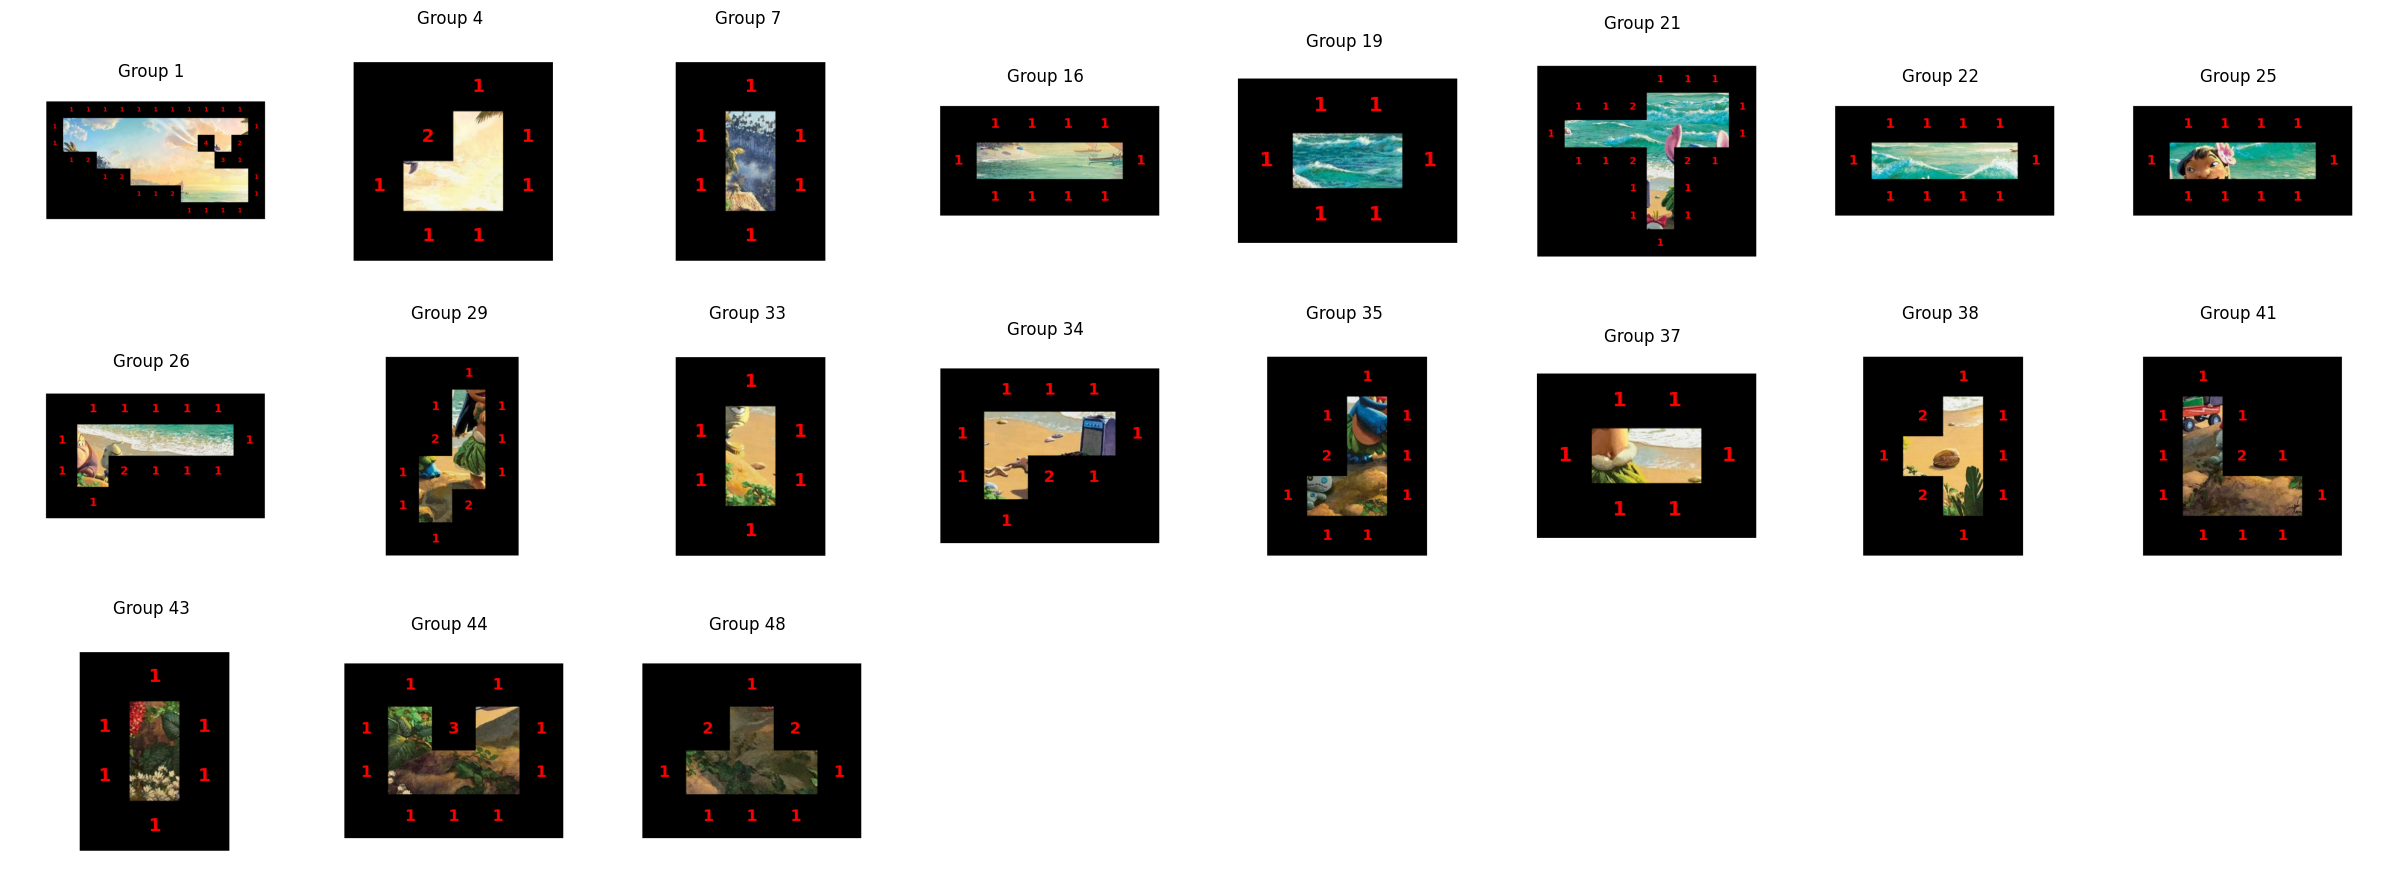

{0: [1, 1]}
{8: [1, 8], 20: [2, 8], 9: [1, 9], 10: [1, 10], 11: [1, 11], 22: [2, 10], 1: [1, 1], 41: [4, 5], 13: [2, 1], 19: [2, 7], 2: [1, 2], 3: [1, 3], 14: [2, 2], 15: [2, 3], 27: [3, 3], 4: [1, 4], 5: [1, 5], 16: [2, 4], 17: [2, 5], 29: [3, 5], 28: [3, 4], 6: [1, 6], 18: [2, 6], 30: [3, 6], 31: [3, 7], 42: [4, 6], 43: [4, 7], 7: [1, 7], 32: [3, 8], 33: [3, 9], 44: [4, 8], 45: [4, 9], 46: [4, 10], 47: [4, 11], 56: [5, 8], 57: [5, 9], 58: [5, 10], 59: [5, 11]}
{12: [1, 1]}
{21: [1, 1]}
{23: [1, 2], 34: [2, 1], 35: [2, 2]}
{24: [1, 1]}
{25: [1, 1]}
{26: [1, 1], 38: [2, 1]}
{36: [1, 1]}
{37: [1, 1]}
{39: [1, 1]}
{40: [1, 1]}
{48: [1, 1]}
{49: [1, 1]}
{50: [1, 1]}
{51: [1, 1]}
{52: [1, 1], 53: [1, 2], 54: [1, 3], 55: [1, 4]}
{60: [1, 1]}
{61: [1, 1]}
{62: [1, 1], 63: [1, 2]}
{64: [1, 1]}
{65: [1, 4], 66: [1, 5], 67: [1, 6], 74: [2, 1], 75: [2, 2], 76: [2, 3], 77: [2, 4], 78: [2, 5], 79: [2, 6], 89: [3, 4], 101: [4, 4], 113: [5, 4]}
{68: [1, 1], 69: [1, 2], 70: [1, 3], 71: [1, 4]}
{72: [

In [4]:
for comp in sorted_sides_comparisons:
    if comp.score < global_values.IMAGE_TH:

        anchor_fragment_idx = comp.side1.fragment_idx
        pasted_fragment_idx = comp.side2.fragment_idx
        anchor_group_idx = fragment_idx_to_group_idx[anchor_fragment_idx]
        pasted_group_idx = fragment_idx_to_group_idx[pasted_fragment_idx]

        if anchor_group_idx != pasted_group_idx:

            shifted_anchor_group, shifted_pasted_group = simulate_merge_positions(comp, groups[anchor_group_idx], groups[pasted_group_idx])

            if does_merge_fit_within_bounds(shifted_anchor_group):
                if check_groups_shapes_for_merging(shifted_anchor_group, shifted_pasted_group):
                    if check_all_group_matchings_scores(shifted_anchor_group, shifted_pasted_group):    
                        score = calculate_all_group_matchings_scores(shifted_anchor_group, shifted_pasted_group)
                        print(f"score: {score}, Comp: {comp}")

                        groups[anchor_group_idx] = merge_groups(shifted_anchor_group, shifted_pasted_group, fragment_idx_to_group_idx)
                        update_after_merge(groups, fragments, fragment_idx_to_group_idx, pasted_group_idx)
show_all_groups(groups, fragments, fragment_idx_to_group_idx, 1)

for g in groups:
    print(g.fragment_positions)



In [ ]:
groups, fragments, fragment_idx_to_group_idx = solve_groups(groups, fragments, fragment_idx_to_group_idx)
show_all_groups(groups, fragments, fragment_idx_to_group_idx, 0)

for g in groups:
    print(f"group rows: {g.row_nr} cols: {g.col_nr}")


Merged group 2 and 0 with total score: 0.016730320714025318 using: Sides Comp: Score=0.016730320714025318 Fragment_idx1=12, Side_idx1=0; fragment_idx2=0, side_idx2=2
Merged group 4 and 1 with total score: 0.03947413463797409 using: Sides Comp: Score=0.11868729766749725 Fragment_idx1=24, Side_idx1=0; fragment_idx2=12, side_idx2=2
